In [1]:
image_path=r'C:\Users\STACBD\bangla-money\Training\1\1_0.jpg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = plt.imread(image_path)
a = np.array(a)
a.shape

(120, 250, 3)

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.144])

In [5]:
X = rgb2gray(a)
X.shape

(120, 250)

In [6]:
class Conv_op:
    # A Convolution layer using 3x3 filters.

    def __init__(self, num_filters, filter_size):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.conv_filter = np.random.randn(num_filters, 3, 3) / 9

    def image_region(self, image):
        h, w = image.shape

        for i in range(h - self.filter_size + 1):
            for j in range(w - self.filter_size + 1):
                im_patch = image[i : (i + self.filter_size), j : (j + self.filter_size)]
                yield im_patch, i, j

    def forward(self, image):
        h, w = image.shape
        output = np.zeros(
            (h - self.filter_size + 1, w - self.filter_size + 1, self.num_filters)
        )

        for im_patch, i, j in self.image_region(image):
            output[i, j] = np.sum(im_patch * self.num_filters, axis=(0, 1))

        return output

In [10]:
conn = Conv_op(8, 5)
out = conn.forward(X)
out.shape

(116, 246, 8)

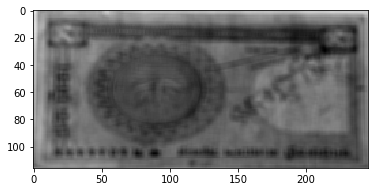

In [11]:
plt.imshow(out[:, :,7],cmap='gray')
plt.show()